In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf

import matplotlib.pyplot as plt

from CBF_utils import load_data

In [23]:
df_movies_train, df_user_train, df_y_train, df_movies, movie_vecs = load_data()

print(f"movies training set shape : {df_movies_train.shape}")
print(f"user training set shape : {df_user_train.shape}")
print(f"y training set shape : {df_y_train.shape}")
print(f"original movies dataset shape : {df_movies.shape}")

movies training set shape : (100836, 23)
user training set shape : (100836, 23)
y training set shape : (100836,)
original movies dataset shape : (9742, 4)


In [3]:
print(f"movies training contains nan values : {df_movies_train.isna().values.sum()}")
print(f"user training contains nan values : {df_user_train.isna().values.sum()}")
print(f"y training contains nan values : {df_y_train.isna().values.sum()}")

movies training contains nan values : 0
user training contains nan values : 0
y training contains nan values : 0


In [4]:
df_movies_train.head(7)

,movieId,year,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1995,3.920930,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,3,1995,3.259615,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
267,6,1995,3.946078,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
369,47,1995,3.975369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
572,50,1995,4.237745,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
776,70,1996,3.509091,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
831,101,1996,3.782609,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
df_user_train.head(7)

,userId,rating_count,rating_mean,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
1,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
2,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
3,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
4,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
5,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714
6,1,232,4.366379,0.0,4.322222,4.388235,4.689655,4.547619,4.277108,4.355556,...,5.0,3.470588,0.0,4.681818,4.166667,4.307692,4.225,4.145455,4.5,4.285714


In [6]:
df_y_train.head(7)

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
5    3.0
6    5.0
Name: rating, dtype: float64

In [7]:
movie_train = df_movies_train.values.astype(float)
user_train = df_user_train.values.astype(float)
y_train = df_y_train.values.astype(float).reshape(-1, 1)

In [8]:
print(np.any(np.isnan(movie_train)))
print(np.any(np.isnan(user_train)))
print(np.any(np.isnan(y_train)))
user_train.dtype

False
False
False


dtype('float64')

In [9]:
movies_train_unscaled = movie_train
user_train_unscaled = user_train
y_train_unscaled = y_train

movie_scaler = StandardScaler()
movie_train = movie_scaler.fit_transform(movie_train)

user_scaler = StandardScaler()
user_train = user_scaler.fit_transform(user_train)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [10]:
print(np.allclose(movies_train_unscaled, movie_scaler.inverse_transform(movie_train)))
print(np.allclose(user_train_unscaled, user_scaler.inverse_transform(user_train)))

True
True


In [11]:
movie_train, movie_test = train_test_split(movie_train, shuffle=True, train_size=0.8, random_state=1)
user_train, user_test = train_test_split(user_train, shuffle=True, train_size=0.8, random_state=1)
y_train, y_test = train_test_split(y_train, shuffle=True, train_size=0.8, random_state=1)

print(f"training data shape : {movie_train.shape}")
print(f"test data shape : {movie_test.shape}")

training data shape : (80668, 23)
test data shape : (20168, 23)


In [12]:
tf.random.set_seed(1)

movie_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='linear'),
], name='movies_NN')

user_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='linear'),
], name='users_NN')

movie_input = tf.keras.layers.Input(shape=(movie_train.shape[1] - 1), name='movie_input')
vm = movie_nn(movie_input)
vm = tf.linalg.l2_normalize(vm, axis=1)

user_input = tf.keras.layers.Input(shape=(user_train.shape[1] - 3), name='user_input')
vu = user_nn(user_input)
vu = tf.linalg.l2_normalize(vu, axis=1)

output = tf.keras.layers.Dot(axes=1)([vu, vm])

model = tf.keras.Model([user_input, movie_input], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 22)]         0           []                               
                                                                                                  
 users_NN (Sequential)          (None, 64)           158528      ['user_input[0][0]']             
                                                                                                  
 movies_NN (Sequential)         (None, 64)           159552      ['movie_input[0][0]']            
                                                                                              

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError())

In [14]:
history = model.fit([user_train[:, 3:], movie_train[:, 1:]],
                      y_train,
                      epochs=20,
                      validation_data=([user_test[:, 3:], movie_test[:, 1:]], y_test),
                      verbose=1
                    )

Epoch 1/20
2521/2521 [==============================] - 13s 5ms/step - loss: 0.0346 - val_loss: 0.0342
Epoch 2/20
2521/2521 [==============================] - 13s 5ms/step - loss: 0.0328 - val_loss: 0.0333
Epoch 3/20
2521/2521 [==============================] - 14s 6ms/step - loss: 0.0322 - val_loss: 0.0324
Epoch 4/20
2521/2521 [==============================] - 14s 5ms/step - loss: 0.0318 - val_loss: 0.0313
Epoch 5/20
2521/2521 [==============================] - 14s 5ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 6/20
2521/2521 [==============================] - 14s 5ms/step - loss: 0.0313 - val_loss: 0.0310
Epoch 7/20
2521/2521 [==============================] - 13s 5ms/step - loss: 0.0308 - val_loss: 0.0311
Epoch 8/20
2521/2521 [==============================] - 13s 5ms/step - loss: 0.0306 - val_loss: 0.0305
Epoch 9/20
2521/2521 [==============================] - 13s 5ms/step - loss: 0.0303 - val_loss: 0.0309
Epoch 10/20
2521/2521 [==============================] - 13s 5ms/step - l

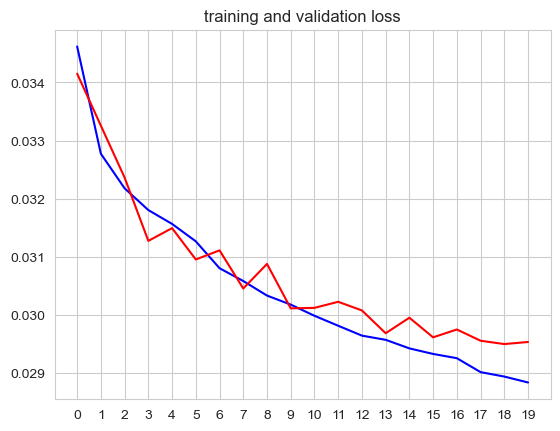

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, loss, 'b', label = 'training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.xticks(epochs)
plt.title('training and validation loss')
plt.show()

In [42]:
new_user = np.array([[700, 0, 0, 0, 5, 4, 4.5, 0.5, 3.5, 3, 2.5, 2, 1, 0.5, 0.5, 0, 0.5, 2.5, 1, 0.5, 1, 2, 0.5]])

user_vecs = np.tile(new_user, (len(movie_vecs), 1))

scaled_user_vecs = user_scaler.transform(user_vecs)
scaled_movie_vecs = movie_scaler.transform(movie_vecs.values)

In [43]:
y_nu = model.predict([scaled_user_vecs[:, 3:], scaled_movie_vecs[:, 1:]])

305/305 [==============================] - 1s 2ms/step


In [47]:
y_nu_unscaled = y_scaler.inverse_transform(y_nu)
df = df_movies.copy()
df.insert(2, 'predicted_user_rating', y_nu_unscaled)
df.insert(3, 'mean_rating', movie_vecs['rating'])
df.sort_values(by='predicted_user_rating', ascending=False, inplace=True)
df.iloc[:7, :]

,movieId,title,predicted_user_rating,mean_rating,genres,year
9731,191005,Gintama (2017),4.568162,4.50,Action|Adventure|Comedy|Sci-Fi,2017
9394,164226,Maximum Ride (2016),4.548100,4.50,Action|Adventure|Comedy|Fantasy|Sci-Fi|Thriller,2016
8422,111146,Alpha and Omega 3: The Great Wolf Games (2014),4.533197,4.50,Action|Adventure|Animation|Children|Comedy,2014
8871,133867,Barely Lethal (2015),4.501761,4.50,Action|Adventure|Comedy,2015
9255,156025,Ice Age: The Great Egg-Scapade (2016),4.485857,5.00,Adventure|Animation|Children|Comedy,2016
8707,124404,"Snowflake, the White Gorilla (2011)",4.475784,5.00,Adventure|Animation|Children|Comedy,2011
8114,100882,Journey to the West: Conquering the Demons (Da...,4.469799,4.75,Adventure|Comedy|Fantasy|Romance|IMAX,2013


In [80]:
df_ratings = pd.read_csv("./dataset/ratings.csv")
df_ou = df_ratings.loc[df_ratings['userId'] == 2, :]
exi_user = df_user_train.loc[df_user_train['userId'] == 2, :].head(1)
da = df_movies.copy()
da = df_ou.drop(columns=['userId', 'timestamp']).merge(df_movies, on='movieId')
da

,movieId,rating,title,genres,year
0,318,3.0,"Shawshank Redemption, The (1994)",Crime|Drama,1994
1,333,4.0,Tommy Boy (1995),Comedy,1995
2,1704,4.5,Good Will Hunting (1997),Drama|Romance,1997
3,3578,4.0,Gladiator (2000),Action|Adventure|Drama,2000
4,6874,4.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,2003
5,8798,3.5,Collateral (2004),Action|Crime|Drama|Thriller,2004
6,46970,4.0,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy,2006
7,48516,4.0,"Departed, The (2006)",Crime|Drama|Thriller,2006
8,58559,4.5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008
9,60756,5.0,Step Brothers (2008),Comedy,2008


In [79]:
exi_user_vecs = np.tile(exi_user.values, (len(movie_vecs), 1))

scaled_exi_user_vecs = user_scaler.transform(exi_user_vecs)

y_exi_u = model.predict([scaled_exi_user_vecs[:, 3:], scaled_movie_vecs[:, 1:]])

305/305 [==============================] - 1s 2ms/step


In [83]:
y_exi_u_uscaled = y_scaler.inverse_transform(y_exi_u)
df_m = df_movies.copy()
df_m.insert(1, 'predicted_ratings', y_exi_u_uscaled)
df_m.drop(columns=['title', 'genres', 'year']).merge(da, on='movieId')

,movieId,predicted_ratings,rating,title,genres,year
0,318,4.342785,3.0,"Shawshank Redemption, The (1994)",Crime|Drama,1994
1,333,4.032282,4.0,Tommy Boy (1995),Comedy,1995
2,1704,4.021544,4.5,Good Will Hunting (1997),Drama|Romance,1997
3,3578,4.131263,4.0,Gladiator (2000),Action|Adventure|Drama,2000
4,6874,4.016548,4.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,2003
5,8798,3.776386,3.5,Collateral (2004),Action|Crime|Drama|Thriller,2004
6,46970,3.635421,4.0,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy,2006
7,48516,4.075258,4.0,"Departed, The (2006)",Crime|Drama|Thriller,2006
8,58559,4.314220,4.5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008
9,60756,3.929608,5.0,Step Brothers (2008),Comedy,2008
